# Master Data Science, Lyon 1
# TP1 PGM 2020 (durée 3h) 

Alex Aussem (aaussem@univ-lyon1.fr)

***
In this tutrial, you will learn how to create and train PGM models with **aGrUM/PyAGrUM**, a GRaphical Universal Modeler available at https://agrum.gitlab.io, developed at LIP6 - DESIR department - Decision Theory team, Université Sorbonne, by Pierre-Henri Wuillemin, Christophe Gonzales and many contributors (PhD students).

The main concepts (conditional independencies, parameter learning, inference, structure learning etc.) seen in the PGM course (Master Data Science, Lyon 1) will be illustrated as well as the excerices.

See also: https://gitlab.com/agrumery/aGrUM,

Installation: conda install -c conda-forge pyagrum

**aGrUM** is a C++ library for graphical models. It is designed for easily building applications using graphical models such as Bayesian networks, influence diagrams, decision trees, GAI networks or Markov decision processes. 

**PyAGrUM** is a Python wrapper for the C++ aGrUM library. It provides a high-level interface to the part of aGrUM allowing to create, handle and make computations into Bayesian Networks.

In this notebook, you will learn how to 

- design a BN model with the basic building blocks provided by Agrum/pyAgrum,
- learn its structure and the parameters from data 
- perform exact or approximate inference with evidence, 
- play with several benchmlark models like **ASIA** and **ALARM**.

Template BNs in various formats are available at: 
https://github.com/eBay/bayesian-belief-networks/tree/master/bayesian/examples/bif

In [1]:
%matplotlib inline
from pylab import *
import matplotlib.pyplot as plt
import os

In [2]:
import pyAgrum

In [3]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

In [4]:
gnb.configuration()

Library,Version
OS,posix [darwin]
Python,"3.7.6 (default, Jan 8 2020, 13:42:34) [Clang 4.0.1 (tags/RELEASE_401/final)]"
IPython,7.11.1
MatPlotLib,3.1.3
Numpy,1.18.1
pyAgrum,0.17.0


## Create the network topology


In [5]:
bn=gum.BayesNet('WaterSprinkler')
print(bn)

BN{nodes: 0, arcs: 0, domainSize: 1, dim: 0}


In [6]:
c=bn.add(gum.LabelizedVariable('c','cloudy ?',2))
print(c)

0


In [7]:
s, r, w = [ bn.add(name, 2) for name in "srw" ] #bn.add(name, 2) === bn.add(gum.LabelizedVariable(name, name, 2))
print (s,r,w)
print (bn)

1 2 3
BN{nodes: 4, arcs: 0, domainSize: 16, dim: 8}


In [8]:
bn.addArc(c,s)

In [9]:
for link in [(c,r),(s,w),(r,w)]:
    bn.addArc(*link)
print(bn)

BN{nodes: 4, arcs: 4, domainSize: 16, dim: 18}


In [12]:
#import pyAgrum.lib.notebook as gnb
bn

(gum::BayesNet<double>@0x7fef91337400) BN{nodes: 4, arcs: 4, domainSize: 16, dim: 18}

In [13]:
bn.cpt(c).fillWith([0.5,0.5])

(gum::Potential<double>@0x7fef93249910) <c:0> :: 0.5 /<c:1> :: 0.5

In [14]:
bn.cpt("c").fillWith([0.4,0.6])

(gum::Potential<double>@0x7fef93249910) <c:0> :: 0.4 /<c:1> :: 0.6

In [15]:
bn.cpt(s).var_names

['c', 's']

In [16]:
bn.cpt(s)[:]=[ [0.5,0.5],[0.9,0.1]]

In [17]:
print(bn.cpt(s)[1])

[0.9 0.1]


In [18]:
bn.cpt(w)[0,0,:] = [1, 0] # r=0,s=0
bn.cpt(w)[0,1,:] = [0.1, 0.9] # r=0,s=1
bn.cpt(w)[1,0,:] = [0.1, 0.9] # r=1,s=0
bn.cpt(w)[1,1,:] = [0.01, 0.99] # r=1,s=1
bn.cpt(w)

(gum::Potential<double>@0x7fef90e3a930) <w:0|s:0|r:0> :: 1 /<w:1|s:0|r:0> :: 0 /<w:0|s:1|r:0> :: 0.1 /<w:1|s:1|r:0> :: 0.9 /<w:0|s:0|r:1> :: 0.1 /<w:1|s:0|r:1> :: 0.9 /<w:0|s:1|r:1> :: 0.01 /<w:1|s:1|r:1> :: 0.99

In [19]:
bn.cpt(r)[{'c':0}]=[0.8,0.2]
bn.cpt(r)[{'c':1}]=[0.2,0.8]

## Inference with evidence

In [20]:
ie=gum.LazyPropagation(bn)
ie.makeInference()

In [21]:
print (ie.posterior(w))

<w:0> :: 0.33328 /<w:1> :: 0.66672


In [22]:
ie.posterior(w)

(gum::Potential<double>@0x7fef931c5490) <w:0> :: 0.33328 /<w:1> :: 0.66672

In [23]:
ie.setEvidence({'s':0, 'c': 0})
ie.makeInference()
ie.posterior(w)

(gum::Potential<double>@0x7fef90e52c60) <w:0> :: 0.82 /<w:1> :: 0.18

In [24]:
ie.setEvidence({'s': [0.5, 1], 'c': [1, 0]})
ie.makeInference()
ie.posterior(w) # using gnb's feature

(gum::Potential<double>@0x7fef93362400) <w:0> :: 0.328 /<w:1> :: 0.672

In [25]:
ie.setEvidence({'s': [0.5, 1]})
ie.makeInference()
ie.posterior(w) # using gnb's feature

(gum::Potential<double>@0x7fef90e36ee0) <w:0> :: 0.278857 /<w:1> :: 0.721143

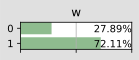

In [26]:
%matplotlib inline
gnb.showProba(ie.posterior(w))

In [27]:
ie.setEvidence({'s': [1, 0], 'c': [0, 1]})
ie.makeInference()
ie.posterior(w) # using gnb's feature

(gum::Potential<double>@0x7fef90e427b0) <w:0> :: 0.28 /<w:1> :: 0.72

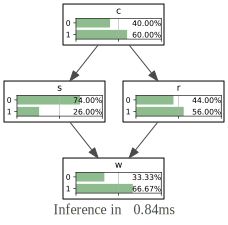

In [28]:
gnb.showInference(bn,evs={})

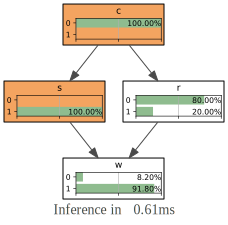

In [29]:
gnb.showInference(bn,evs={'s':1,'c':0})

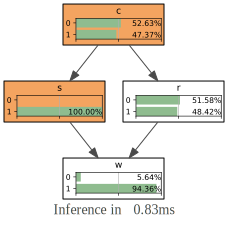

In [30]:
gnb.showInference(bn,evs={'s':1,'c':[0.3,0.9]})

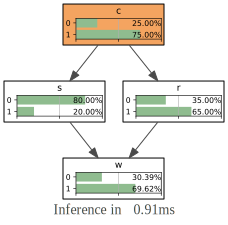

In [31]:
gnb.showInference(bn,evs={'c':[0.5,1]})
# 0.4 x 0.5 = 0.2 , 0.6 x 1 = 0.6 , 0.2 / (0.2 + 0.6) = 25.0%

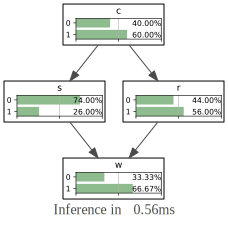

In [32]:
gnb.showInference(bn)

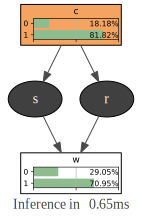

In [33]:
gnb.showInference(bn,evs={'c':[0.3,0.9]},targets={'c','w'})

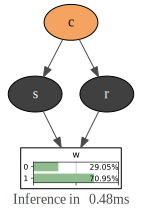

In [34]:
gnb.showInference(bn,evs={'c':[0.3,0.9]},targets={'w'})

# Joint probablity distribution

In [35]:
pCRSW=bn.cpt("c")*bn.cpt("r")*bn.cpt("s")*bn.cpt("w")
pCRSW

(gum::Potential<double>@0x7fef93367000) <s:0|r:0|w:0|c:0> :: 0.16 /<s:1|r:0|w:0|c:0> :: 0.016 /<s:0|r:1|w:0|c:0> :: 0.004 /<s:1|r:1|w:0|c:0> :: 0.0004 /<s:0|r:0|w:1|c:0> :: 0 /<s:1|r:0|w:1|c:0> :: 0.144 /<s:0|r:1|w:1|c:0> :: 0.036 /<s:1|r:1|w:1|c:0> :: 0.0396 /<s:0|r:0|w:0|c:1> :: 0.108 /<s:1|r:0|w:0|c:1> :: 0.0012 /<s:0|r:1|w:0|c:1> :: 0.0432 /<s:1|r:1|w:0|c:1> :: 0.00048 /<s:0|r:0|w:1|c:1> :: 0 /<s:1|r:0|w:1|c:1> :: 0.0108 /<s:0|r:1|w:1|c:1> :: 0.3888 /<s:1|r:1|w:1|c:1> :: 0.04752

In [36]:
pWgivenC=(pCRSW.margSumOut(["r","s"])/pCRSW.margSumOut(["r","s","w"]))
pWgivenC

(gum::Potential<double>@0x7fef90eb2dc0) <c:0|w:0> :: 0.451 /<c:1|w:0> :: 0.2548 /<c:0|w:1> :: 0.549 /<c:1|w:1> :: 0.7452

In [37]:
pRS=pCRSW.margSumOut(["c","w"])
pRS

(gum::Potential<double>@0x7fef933f3990) <s:0|r:0> :: 0.268 /<s:1|r:0> :: 0.172 /<s:0|r:1> :: 0.472 /<s:1|r:1> :: 0.088

In [38]:
pRS.margSumOut(["r"])

(gum::Potential<double>@0x7fef90eaad80) <s:0> :: 0.74 /<s:1> :: 0.26

## Loading a benchmark BN model

In [39]:
!pwd
bn = gum.loadBN(os.path.join("templates","alarm.bif"))
#bn = gum.loadBN("alarm.bif")

/Users/virgilefoy/workspace/pgm/TP1_PGM


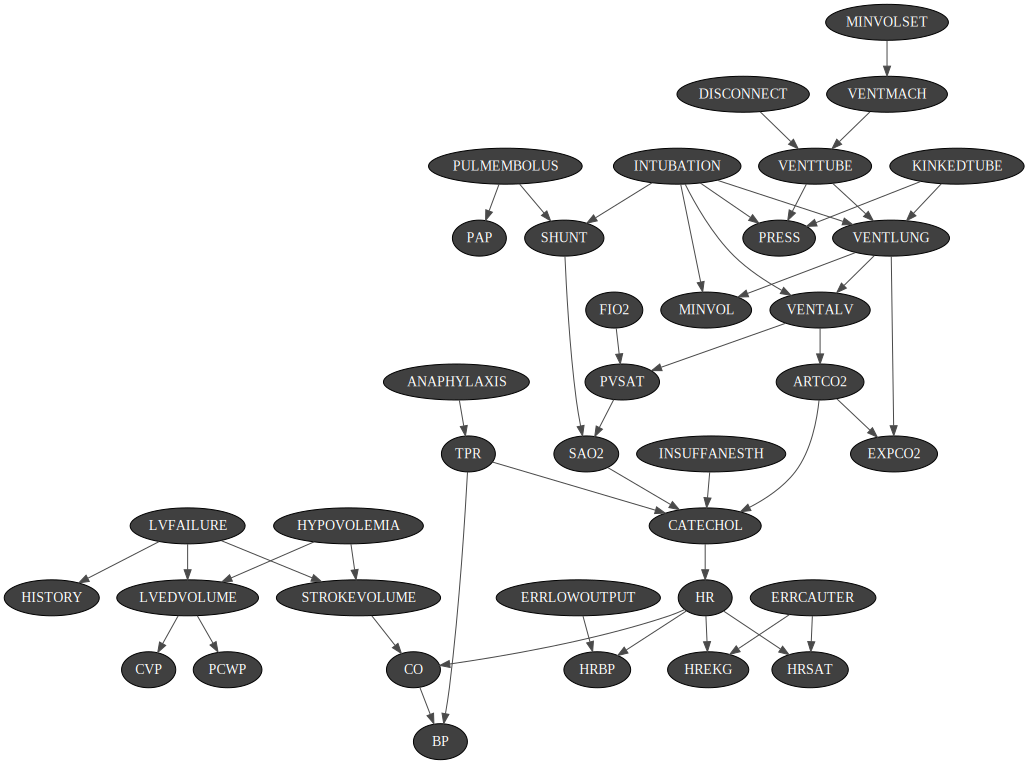

In [64]:
gnb.showBN(bn,size='10000')

# Visualisation and inspection


In [41]:
print(bn.variableFromName('SHUNT'))

SHUNT<NORMAL,HIGH>


In [42]:
print(bn.cpt(bn.idFromName('SHUNT')))

<SHUNT:NORMAL|INTUBATION:NORMAL|PULMEMBOLUS:TRUE> :: 0.1 /<SHUNT:HIGH|INTUBATION:NORMAL|PULMEMBOLUS:TRUE> :: 0.9 /<SHUNT:NORMAL|INTUBATION:ESOPHAGEAL|PULMEMBOLUS:TRUE> :: 0.1 /<SHUNT:HIGH|INTUBATION:ESOPHAGEAL|PULMEMBOLUS:TRUE> :: 0.9 /<SHUNT:NORMAL|INTUBATION:ONESIDED|PULMEMBOLUS:TRUE> :: 0.01 /<SHUNT:HIGH|INTUBATION:ONESIDED|PULMEMBOLUS:TRUE> :: 0.99 /<SHUNT:NORMAL|INTUBATION:NORMAL|PULMEMBOLUS:FALSE> :: 0.95 /<SHUNT:HIGH|INTUBATION:NORMAL|PULMEMBOLUS:FALSE> :: 0.05 /<SHUNT:NORMAL|INTUBATION:ESOPHAGEAL|PULMEMBOLUS:FALSE> :: 0.95 /<SHUNT:HIGH|INTUBATION:ESOPHAGEAL|PULMEMBOLUS:FALSE> :: 0.05 /<SHUNT:NORMAL|INTUBATION:ONESIDED|PULMEMBOLUS:FALSE> :: 0.05 /<SHUNT:HIGH|INTUBATION:ONESIDED|PULMEMBOLUS:FALSE> :: 0.95


In [43]:
gnb.showPotential(bn.cpt(bn.idFromName('SHUNT')),digits=3)

# Inference

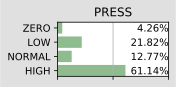

In [44]:
ie=gum.LazyPropagation(bn)
ie.makeInference()
gnb.showPosterior(bn,{'SHUNT':'HIGH'},'PRESS')

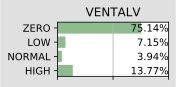

In [45]:
gnb.showPosterior(bn,{'MINVOLSET':'NORMAL'},'VENTALV')

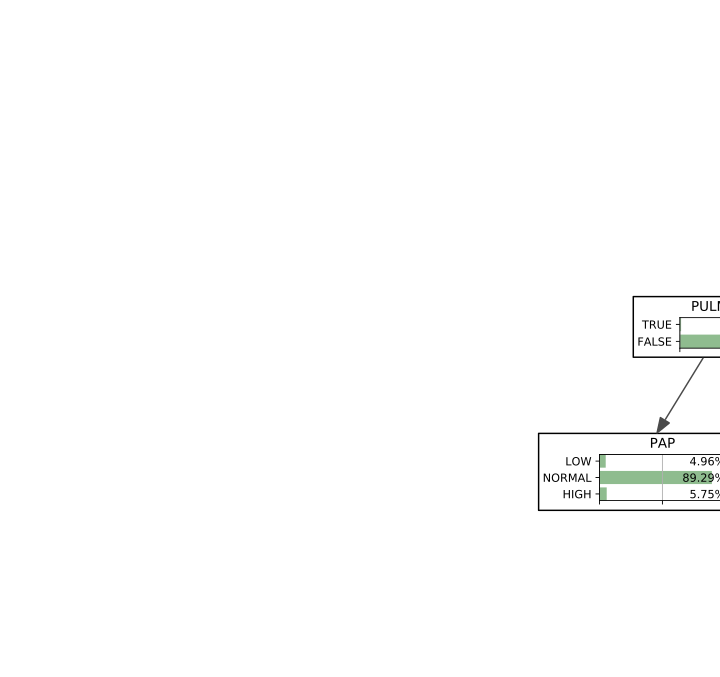

In [46]:
gnb.showInference(bn,size="10",evs={'MINVOLSET':'NORMAL'})

In [47]:
#ie=gum.LazyPropagation(bn)
ie.evidenceImpact('PRESS',['SHUNT','VENTALV'])

(gum::Potential<double>@0x7fef93396600) <PRESS:ZERO|VENTALV:ZERO|SHUNT:NORMAL> :: 0.0221183 /<PRESS:LOW|VENTALV:ZERO|SHUNT:NORMAL> :: 0.263196 /<PRESS:NORMAL|VENTALV:ZERO|SHUNT:NORMAL> :: 0.269519 /<PRESS:HIGH|VENTALV:ZERO|SHUNT:NORMAL> :: 0.445166 /<PRESS:ZERO|VENTALV:LOW|SHUNT:NORMAL> :: 0.125371 /<PRESS:LOW|VENTALV:LOW|SHUNT:NORMAL> :: 0.10827 /<PRESS:NORMAL|VENTALV:LOW|SHUNT:NORMAL> :: 0.110427 /<PRESS:HIGH|VENTALV:LOW|SHUNT:NORMAL> :: 0.655931 /<PRESS:ZERO|VENTALV:NORMAL|SHUNT:NORMAL> :: 0.0286313 /<PRESS:LOW|VENTALV:NORMAL|SHUNT:NORMAL> :: 0.267487 /<PRESS:NORMAL|VENTALV:NORMAL|SHUNT:NORMAL> :: 0.211507 /<PRESS:HIGH|VENTALV:NORMAL|SHUNT:NORMAL> :: 0.492375 /<PRESS:ZERO|VENTALV:HIGH|SHUNT:NORMAL> :: 0.011516 /<PRESS:LOW|VENTALV:HIGH|SHUNT:NORMAL> :: 0.276194 /<PRESS:NORMAL|VENTALV:HIGH|SHUNT:NORMAL> :: 0.0704238 /<PRESS:HIGH|VENTALV:HIGH|SHUNT:NORMAL> :: 0.641867 /<PRESS:ZERO|VENTALV:ZERO|SHUNT:HIGH> :: 0.0230181 /<PRESS:LOW|VENTALV:ZERO|SHUNT:HIGH> :: 0.260988 /<PRESS:NORMAL|VENTALV:ZERO|SHUNT:HIGH> :: 0.26437 /<PRESS:HIGH|VENTALV:ZERO|SHUNT:HIGH> :: 0.451623 /<PRESS:ZERO|VENTALV:LOW|SHUNT:HIGH> :: 0.0242729 /<PRESS:LOW|VENTALV:LOW|SHUNT:HIGH> :: 0.027722 /<PRESS:NORMAL|VENTALV:LOW|SHUNT:HIGH> :: 0.0211337 /<PRESS:HIGH|VENTALV:LOW|SHUNT:HIGH> :: 0.926871 /<PRESS:ZERO|VENTALV:NORMAL|SHUNT:HIGH> :: 0.118778 /<PRESS:LOW|VENTALV:NORMAL|SHUNT:HIGH> :: 0.353364 /<PRESS:NORMAL|VENTALV:NORMAL|SHUNT:HIGH> :: 0.0360745 /<PRESS:HIGH|VENTALV:NORMAL|SHUNT:HIGH> :: 0.491783 /<PRESS:ZERO|VENTALV:HIGH|SHUNT:HIGH> :: 0.0136186 /<PRESS:LOW|VENTALV:HIGH|SHUNT:HIGH> :: 0.271903 /<PRESS:NORMAL|VENTALV:HIGH|SHUNT:HIGH> :: 0.068295 /<PRESS:HIGH|VENTALV:HIGH|SHUNT:HIGH> :: 0.646183

#  Entropy of all nodes

In [48]:
gnb.showInformation(bn,{},size="20")

# Impact of evidence

In [49]:
gnb.showInformation(bn,{"CO":0},size="9")

# Exploring the junction tree

Lazy Propagation, like several other inference algorithms, uses a junction tree to propagate information.

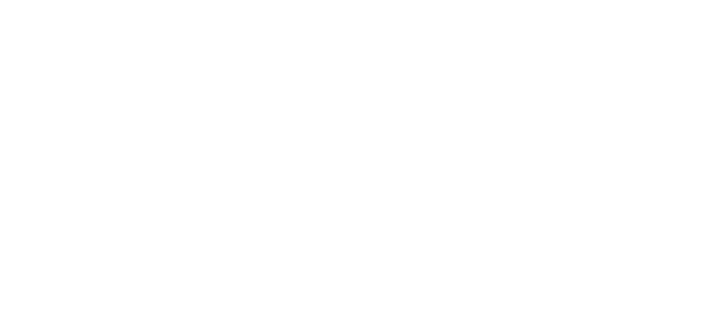

In [50]:
jt=ie.junctionTree()
gnb.showJunctionTree(bn,size="10")

# Inference as a function

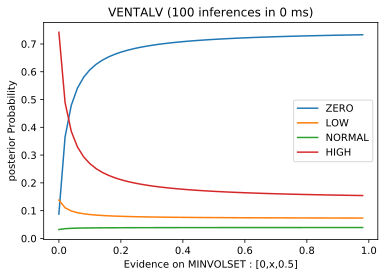

In [51]:
import time

r=range(0,100,2)
xs=[x/100.0 for x in r]

tf=time.time()
ys=[gum.getPosterior(bn,{'MINVOLSET':[0,x/100.0,0.5]},'VENTALV').tolist() 
        for x in r]
delta=time.time()-tf

p=plot(xs,ys)
legend(p,[bn.variableFromName('VENTALV').label(i) 
          for i in range(bn.variableFromName('VENTALV').domainSize())],loc=7);
title('VENTALV (100 inferences in %d ms)'%delta);
ylabel('posterior Probability');
xlabel('Evidence on MINVOLSET : [0,x,0.5]');

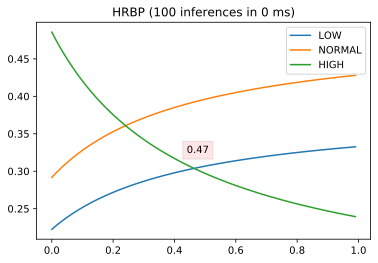

In [52]:
x=[p/100.0 for p in range(0,100)]

tf=time.time()
y=[gum.getPosterior(bn,{'HRBP':[1.0-p/100.0,1.0-p/100.0,p/100.0]},'TPR').tolist() 
   for p in range(0,100)]
delta=time.time()-tf

p=plot(x,y)
title('HRBP (100 inferences in %d ms)'%delta);
v=bn.variableFromName('TPR');
legend([v.label(i) for i in range(v.domainSize())],loc='best');
np1=(transpose(y)[2]>transpose(y)[0]).argmin()
text(x[np1]-0.03,y[np1][0]+0.02,str(x[np1]),bbox=dict(facecolor='red', alpha=0.1));

# Data generation

In [62]:
from pyAgrum.lib.bn2csv import generateCSV
generateCSV(bn,os.path.join("data","test.csv"),1000,visible=True)

** The library 'gum.lib.bn2csv' is deprecated in pyAgrum>0.12.0. Please use gum.generateCSV instead.
** The function 'gum.lib.bn2csv.generateCSV' is deprecated in pyAgrum>0.12.0. Please use gum.generateCSV instead.
** Class 'CSVGenerator' is is deprecated in pyAgrum>0.12.0. Please use gum.generateCSV instead.
 data/test.csv : [ ########################################################### ] 100%
Log2-Likelihood : -15138.636177524828



-15138.636177524828

In [63]:
from pyAgrum.lib._utils import oslike
#oslike.head(os.path.join('dossier', 'test.csv'))
oslike.head(os.path.join("data","test.csv"))

MINVOLSET,VENTMACH,DISCONNECT,VENTTUBE,INTUBATION,PULMEMBOLUS,SHUNT,PAP,FIO2,KINKEDTUBE,PRESS,VENTLUNG,VENTALV,PVSAT,SAO2,ARTCO2,EXPCO2,MINVOL,ANAPHYLAXIS,TPR,INSUFFANESTH,CATECHOL,HR,ERRCAUTER,HREKG,HRSAT,ERRLOWOUTPUT,HRBP,LVFAILURE,HISTORY,HYPOVOLEMIA,LVEDVOLUME,PCWP,CVP,STROKEVOLUME,CO,BP
LOW,LOW,FALSE,ZERO,NORMAL,FALSE,NORMAL,NORMAL,NORMAL,FALSE,HIGH,NORMAL,NORMAL,LOW,LOW,NORMAL,NORMAL,LOW,FALSE,LOW,FALSE,HIGH,HIGH,FALSE,HIGH,HIGH,FALSE,HIGH,FALSE,FALSE,FALSE,NORMAL,NORMAL,NORMAL,NORMAL,HIGH,LOW
NORMAL,NORMAL,FALSE,LOW,NORMAL,FALSE,NORMAL,NORMAL,NORMAL,FALSE,HIGH,LOW,HIGH,HIGH,HIGH,LOW,LOW,HIGH,FALSE,LOW,FALSE,HIGH,HIGH,FALSE,HIGH,HIGH,FALSE,HIGH,FALSE,FALSE,FALSE,NORMAL,NORMAL,NORMAL,NORMAL,HIGH,NORMAL
NORMAL,NORMAL,FALSE,LOW,NORMAL,FALSE,NORMAL,NORMAL,NORMAL,FALSE,NORMAL,ZERO,NORMAL,LOW,LOW,NORMAL,LOW,ZERO,FALSE,HIGH,FALSE,NORMAL,NORMAL,FALSE,LOW,LOW,FALSE,LOW,FALSE,FALSE,FALSE,NORMAL,NORMAL,NORMAL,HIGH,NORMAL,HIGH
NORMAL,NORMAL,FALSE,LOW,NORMAL,FALSE,NORMAL,NORMAL,NORMAL,FALSE,H

# BN as a probabistic classifier

 data/test.csv : [ ########################################################### ] 100%
 result in data/test.csv-ROC_alarm.bif-CATECHOL-HIGH.png


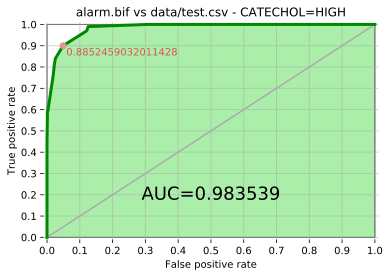

In [64]:
from pyAgrum.lib.bn2roc import showROC
showROC(bn,os.path.join("data","test.csv"),
        variable='CATECHOL',label='HIGH',  # class and label 
        visible=True,show_fig=True,with_labels=True)      

 data/test.csv : [ ########################################################### ] 100%
 result in data/test.csv-ROC_alarm.bif-SAO2-HIGH.png


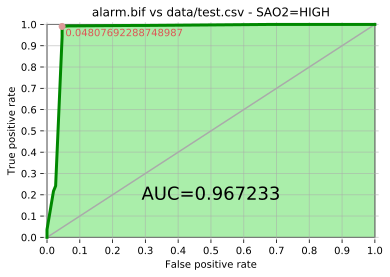

In [65]:
showROC(bn,os.path.join("data","test.csv"),'SAO2','HIGH',visible=True)

# Fast prototyping of BNs

In [66]:
bn1=gum.fastBN("a->b;a->c;b->c;c->d",3)
gnb.sideBySide(*[gnb.getInference(bn1,evs={'c':val},targets={'a','c','d'}) for val in range(3)],
              captions=["<pre>Inference given that c={}</pre>".format(val) for val in range(3)])

Inference given that c=0,Inference given that c=1,Inference given that c=2


In [67]:
print(gum.getPosterior(bn1,evs={'c':0},target='c'))
print(gum.getPosterior(bn1,evs={'c':0},target='a'))

<c:0> :: 1 /<c:1> :: 0 /<c:2> :: 0
<a:0> :: 0.523453 /<a:1> :: 0.21176 /<a:2> :: 0.264787



# Joint posterior, impact of evidence

In [68]:
bn=gum.fastBN("a->b->c->d;b->e->d->f;g->c")
gnb.sideBySide(bn,gnb.getInference(bn))

In [69]:
ie=gum.LazyPropagation(bn)
ie.addJointTarget({"e","f","g"})
ie.makeInference()
gnb.sideBySide(ie.jointPosterior({"e","f","g"}),ie.jointPosterior({"e","f"}),
               captions=["Joint posterior $P(e,f,g)$","Joint posterior $P(e,f)$"])

In [70]:
gnb.sideBySide(ie.evidenceImpact("a",["e","f"]),ie.evidenceImpact("a",["d","e","f"]),
              captions=["$\\forall e,f, P(a|e,f)$",
                        "$\\forall d,e,f, P(a|d,e,f)=P(a|d,e)$ using d-separation"]
                        )

In [71]:
gnb.sideBySide(ie.evidenceJointImpact(["a","b"],["e","f"]),
               ie.evidenceJointImpact(["a","b"],["d","e","f"]),
              captions=["$\\forall e,f, P(a,b|e,f)$",
                        "$\\forall d,e,f, P(a,b|d,e,f)=P(a,b|d,e)$ using d-separation"]
                        )

# BN structure learning from data


In [72]:
!pwd
bn = gum.loadBN(os.path.join("templates","asia.bif"))
bn

/Users/aaussem/Documents/Python/TP/TP_PGM_2020


(gum::BayesNet<double>@0x7fb87b144800) BN{nodes: 8, arcs: 8, domainSize: 256, dim: 36}

In [73]:
gum.generateCSV(bn,os.path.join("data","sample_asia.csv"),5000,True)
#gum.generateCSV(bn,"sample_asia.csv",5000,with_labels=True)

 data/sample_asia.csv : [ #################################################### ] 100%
Log2-Likelihood : -16055.37955090398


-16055.37955090398

In [74]:
import pandas
df=pandas.read_csv(os.path.join("data","sample_asia.csv"))
df.head()

,lung_cancer?,positive_XraY?,dyspnoea?,tuberculos_or_cancer?,tuberculosis?,bronchitis?,smoking?,visit_to_Asia?
0,1,1,0,1,1,0,0,1
1,1,1,1,1,1,1,0,1
2,1,1,1,1,1,1,1,1
3,1,1,0,1,1,0,0,1
4,1,1,0,1,1,0,1,1


In [75]:
#gum.generateCSV(bn,"sample_asia.csv",5000,with_labels=True)
c=pandas.crosstab(df['dyspnoea?'],[df['tuberculos_or_cancer?'],df['bronchitis?']])
c

tuberculos_or_cancer?    0          1      
bronchitis?              0    1     0     1
dyspnoea?                                  
0                      169  104  1663   254
1                       13   50   407  2340

In [76]:
import pyAgrum.lib._utils.oslike as oslike
print("===\n  Size of the generated database\n===")
oslike.wc_l(os.path.join("data","sample_asia.csv"))
print("\n===\n  First lines\n===")
oslike.head(os.path.join("data","sample_asia.csv"))

===
  Size of the generated database
===
5000

===
  First lines
===
lung_cancer?,positive_XraY?,dyspnoea?,tuberculos_or_cancer?,tuberculosis?,bronchitis?,smoking?,visit_to_Asia?
1,1,0,1,1,0,0,1
1,1,1,1,1,1,0,1
1,1,1,1,1,1,1,1
1,1,0,1,1,0,0,1
1,1,0,1,1,0,1,1
1,1,1,1,1,1,0,1
1,1,0,1,1,0,0,1
1,1,0,1,1,0,0,1
1,1,1,1,1,0,0,1



In [77]:
gum.generateCSV(bn,os.path.join("data","sample_asia.csv"),5000,with_labels=True)
learner=gum.BNLearner(os.path.join("data","sample_asia.csv"),bn) #using bn as template for variables
learner.names()

('visit_to_Asia?',
 'tuberculosis?',
 'tuberculos_or_cancer?',
 'positive_XraY?',
 'lung_cancer?',
 'smoking?',
 'bronchitis?',
 'dyspnoea?')

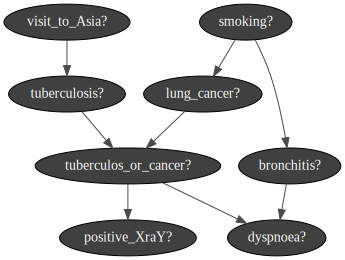

In [78]:
learner.setInitialDAG(bn.dag())
bn2=learner.learnParameters()
gnb.showBN(bn2)

In [79]:
learner.idFromName('lung_cancer?') 

4

In [80]:
learner.nameFromId(4)

'lung_cancer?'

In [81]:
learner=gum.BNLearner(os.path.join("data","sample_asia.csv"),bn) #using bn as template for variables and labels
learner.setInitialDAG(bn.dag())
bn2=learner.learnParameters()

In [82]:
from IPython.display import HTML

HTML('<table><tr><td style="text-align:center;"><h3>original BN</h3></td>'+
     '<td style="text-align:center;"><h3>Learned BN</h3></td></tr>'+
     '<tr><td><center>'+
     gnb.getPotential(bn.cpt (bn.idFromName('visit_to_Asia?')))
     +'</center></td><td><center>'+
     gnb.getPotential(bn2.cpt(bn2.idFromName('visit_to_Asia?')))
     +'</center></td></tr><tr><td><center>'+
     gnb.getPotential(bn.cpt (bn.idFromName('tuberculosis?')))
     +'</center></td><td><center>'+
     gnb.getPotential(bn2.cpt(bn2.idFromName('tuberculosis?')))
     +'</center></td></tr></table>')


# Various score-based learning algorithms


In [83]:
learner=gum.BNLearner(os.path.join("data","sample_asia.csv"),bn) #using bn as template for variables
learner.useLocalSearchWithTabuList()
bn2=learner.learnBN()
print("Learned in {0}ms".format(1000*learner.currentTime()))
gnb.sideBySide(bn2,gnb.getInformation(bn2))
kl=gum.BruteForceKL(bn,bn2)
kl.compute()

Learned in 4.399358ms


** pyAgrum.BruteForceKL is deprecated in pyAgrum>0.12.6.
** A pyAgrum.ExactBNdistance has been created.


{'klPQ': 0.007422894507389233,
 'errorPQ': 0,
 'klQP': 0.006404851334445917,
 'errorQP': 128,
 'hellinger': 0.048927573468476405,
 'bhattacharya': 0.0011976649953752082,
 'jensen-shannon': 0.0016465840748716878}

In [84]:
learner=gum.BNLearner(os.path.join("data","sample_asia.csv"),bn) #using bn as template for variables
learner.useGreedyHillClimbing()
bn2=learner.learnBN()
print("Learned in {0}ms".format(1000*learner.currentTime()))
gnb.sideBySide(bn2,gnb.getInformation(bn2))

Learned in 4.280025ms


In [85]:
learner=gum.BNLearner(os.path.join("data","sample_asia.csv"),bn) #using bn as template for variables
learner.useK2([0,1,2,3,4,5,6,7])
bn2=learner.learnBN()
print("Learned in {0}ms".format(1000*learner.currentTime()))
bn2

Learned in 1.845563ms


(gum::BayesNet<double>@0x7fb87c284600) BN{nodes: 8, arcs: 8, domainSize: 256, dim: 36}

In [86]:
learner=gum.BNLearner(os.path.join("data","sample_asia.csv"),bn) #using bn as template for variables
learner.useK2([7,6,5,4,3,2,1,0])
bn2=learner.learnBN()
print("Learned in {0}s".format(learner.currentTime()))
bn2

Learned in 0.001223764s


(gum::BayesNet<double>@0x7fb85b1a5200) BN{nodes: 8, arcs: 11, domainSize: 256, dim: 56}


# Plotting the score during learning

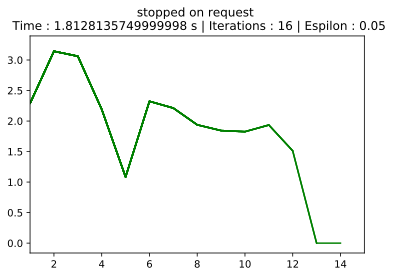

In [87]:
import numpy as np
%matplotlib inline

learner=gum.BNLearner(os.path.join("data","sample_asia.csv"),bn) #using bn as template for variables
learner.useLocalSearchWithTabuList()

# we could prefere a log2likelihood score
# learner.useScoreLog2Likelihood()
learner.setMaxTime(10)

# representation of the error as a pseudo log (negative values really represents negative epsilon
@np.vectorize
def pseudolog(x):
    seuil=2.0
    y=-x if x<0 else x
        
    if y<seuil:
        res=y*np.log10(seuil)/seuil
    else:
        res=np.log10(y)
        
    return res if x>0 else -res

# in order to control the complexity, we limit the number of parents
learner.setMaxIndegree(3) # no more than 3 parent by node
gnb.animApproximationScheme(learner,
                            scale=pseudolog) # scale by default is np.log10

bn2=learner.learnBN()

# Learning a tree


In [88]:
learner=gum.BNLearner(os.path.join("data","sample_asia.csv"),bn) #using bn as template for variables
learner.useGreedyHillClimbing()

learner.setMaxIndegree(1) # no more than 1 parent by node

bntree=learner.learnBN()
bntree

(gum::BayesNet<double>@0x7fb87b1dec00) BN{nodes: 8, arcs: 6, domainSize: 256, dim: 28}

# Learning with prior structural knowledge


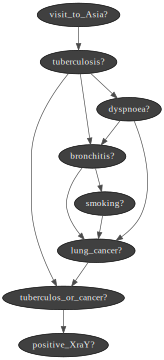

In [89]:
learner=gum.BNLearner(os.path.join("data","sample_asia.csv"),bn) #using bn as template for variables
learner.useGreedyHillClimbing()

# I know that smoking causes cancer
learner.addMandatoryArc("smoking?","lung_cancer?") # smoking->lung_cancer
# I know that visit to Asia may change the risk of tuberculosis
learner.addMandatoryArc("visit_to_Asia?","tuberculosis?") # visit_to_Asia->tuberculosis

bn2=learner.learnBN()
gnb.showBN(bn2,size="5")

# Comparing BNs


In [90]:
help(gnb.getBNDiff)

Help on function getBNDiff in module pyAgrum.lib.notebook:

getBNDiff(bn1, bn2, size=None)
    get a HTML string representation of a graphical diff between the arcs of _bn1 (reference) with those of _bn2.
    
    * full black line: the arc is common for both
    * full red line: the arc is common but inverted in _bn2
    * dotted black line: the arc is added in _bn2
    * dotted red line: the arc is removed in _bn2
    
    :param BayesNet bn1: referent model for the comparison
    :param BayesNet bn2: bn compared to the referent model
    :param size: size of the rendered graph



In [91]:
gnb.sideBySide(bn,bn2,gnb.getBNDiff(bn,bn2),
              captions=['target','learned BN','graphical diffs between target and learned'])

target,learned BN,graphical diffs between target and learned


In [92]:
kl=gum.BruteForceKL(bn,bn2)
kl.compute()

** pyAgrum.BruteForceKL is deprecated in pyAgrum>0.12.6.
** A pyAgrum.ExactBNdistance has been created.


{'klPQ': 0.007391596484509329,
 'errorPQ': 0,
 'klQP': 0.007103150079349712,
 'errorQP': 128,
 'hellinger': 0.051253289509635036,
 'bhattacharya': 0.0013143075247823586,
 'jensen-shannon': 0.0018453102596094296}

In [93]:
learner=gum.BNLearner(os.path.join("data","sample_asia.csv"),bn) #using bn as template for variables
learner.useGreedyHillClimbing()

# I know that smoking causes cancer
learner.addMandatoryArc(0,1)

# we prefere a log2likelihood score
learner.useScoreLog2Likelihood()

# in order to control the complexity, we limit the number of parents
learner.setMaxIndegree(1) # no more than 1 parent by node

bn2=learner.learnBN()
kl=gum.BruteForceKL(bn,bn2)
gnb.sideBySide(bn2,
               "<br/>".join(["<b>"+k+"</b> :"+str(v) for k,v in kl.compute().items()]),
               captions=["learned BN","distances"])

** pyAgrum.BruteForceKL is deprecated in pyAgrum>0.12.6.
** A pyAgrum.ExactBNdistance has been created.


In [94]:
learner=gum.BNLearner(os.path.join("data","sample_asia.csv"),bn) #using bn as template for variables
learner.useGreedyHillClimbing()
learner.addMandatoryArc(0,1)
bn2=learner.learnBN()
kl=gum.BruteForceKL(bn,bn2)
gnb.sideBySide(bn2,
               "<br/>".join(["<b>"+k+"</b> :"+str(v) for k,v in kl.compute().items()]),
               captions=["learned BN","distances"])

** pyAgrum.BruteForceKL is deprecated in pyAgrum>0.12.6.
** A pyAgrum.ExactBNdistance has been created.


In [95]:
learner=gum.BNLearner(os.path.join("data","sample_asia.csv"),bn) #using bn as template for variables
learner.useLocalSearchWithTabuList()

learner.setInitialDAG(bn2.dag())
#learner.setMaxNbDecreasingChanges(2)

bn3=learner.learnBN()
kl=gum.BruteForceKL(bn,bn3)
gnb.sideBySide(bn3,
               "<br/>".join(["<b>"+k+"</b> :"+str(v) for k,v in kl.compute().items()]),
               captions=["learned BN","distances"])

** pyAgrum.BruteForceKL is deprecated in pyAgrum>0.12.6.
** A pyAgrum.ExactBNdistance has been created.


In [96]:
from pyAgrum.lib.bn2csv import generateCSV
generateCSV(bn,os.path.join("data","test.csv"),1000,visible=True)

** The function 'gum.lib.bn2csv.generateCSV' is deprecated in pyAgrum>0.12.0. Please use gum.generateCSV instead.
** Class 'CSVGenerator' is is deprecated in pyAgrum>0.12.0. Please use gum.generateCSV instead.
 data/test.csv : [ ########################################################### ] 100%
Log2-Likelihood : -3241.927540701935



-3241.927540701935

In [97]:
from pyAgrum.lib._utils import oslike
oslike.head(os.path.join("data","test.csv"))

smoking?,lung_cancer?,bronchitis?,visit_to_Asia?,tuberculosis?,tuberculos_or_cancer?,dyspnoea?,positive_XraY?
f2,e2,g2,a2,b2,c2,h2,d2
f1,e2,g1,a2,b2,c2,h1,d2
f1,e1,g1,a2,b2,c1,h1,d1
f2,e2,g2,a2,b2,c2,h2,d2
f2,e2,g2,a2,b2,c2,h2,d2
f1,e2,g1,a2,b2,c2,h1,d2
f2,e2,g2,a2,b2,c2,h2,d2
f1,e2,g1,a2,b2,c2,h1,d2
f2,e2,g2,a2,b2,c2,h2,d2



In [98]:
bn1=gum.fastBN("a->b;a->c;b->c;c->d",3)

gnb.sideBySide(*[gnb.getInference(bn1,evs={'c':val},
                targets={'a','c','d'}) for val in range(3)],
              captions=["<pre>Inference given that c={}</pre>".format(val) for val in range(3)])

Inference given that c=0,Inference given that c=1,Inference given that c=2


---
# TO DO

- ### Implémenter avec PyAGrUM les exercices BN et HMM du TD1 PGM. 
- ### Confirmer les résutats obtenus "à la main".
---

### Faire l'excerice BN du partiel:

$$
     P(A=1) = 0.5 \\
     P(B=1) = 0.5\\
     P(C=1| A=1,B=1) = 0.9 \\
     P(C=1| A=1,B=0) = 0.5 \\
     P(C=1| A=0,B=1) = 0.5 \\
     P(C=1| A=0,B=0) = 0.1 \\
     P(D=1\mid B=1) = 0.9 \\
     P(D=1\mid B=0) = 0.1 \\
     P(E=1\mid C=1) = 0.9 \\
     P(E=1\mid C=0) = 0.1 \\
$$

- Vérifier que $A$ est indépendent $B$ 

- Calculer  $p(A=1,B=1,C=1,D=1,E=1)$ et $P(C=0)$.

- Montrer que $P(A=1,D=1\mid E=0) \neq P(A=1,D=1)$. Que peut-on en déduire en terme d'indépendance ? Interpréter le résultat. 

- Supposons que $C$ et $B$ ne soient pas observées, que devient le DAG consrtuit avec $A$, $D$ et $E$ ? Les indépendances entre $A$, $D$ et $E$ sont elles bien encodées dans ce nouveau DAG ? Que conclure ?

